In [1]:
from utilities import *
import matplotlib.pyplot as plt

In [2]:
dias = 2455
access_token = '63ab8fe9b94c7c7a4ebc6c03d79550f93818202a'

In [3]:
df_dmep_original = load_especie("DOLAR MEP", access_token)
df_djones_original = load_especie("DIA_US", access_token)
df_merval_original = load_especie('MERVAL', access_token)
df_doficial_original = load_especie('DOLAR OFICIAL', access_token)
df_ypfd_original = load_especie('YPFD', access_token)

df_ypfd = recortar(df_ypfd_original, dias)
df_dmep = recortar(df_dmep_original, dias)
df_doficial = recortar(df_doficial_original, dias + (int(dias/7)*2))
df_merval = recortar(df_merval_original, dias)
df_djones = recortar(df_djones_original, dias)


Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.


Dolar Oficial: Verde
Dolar MEP: Azul
Merval: Rojo
Down Jones: Amarillo


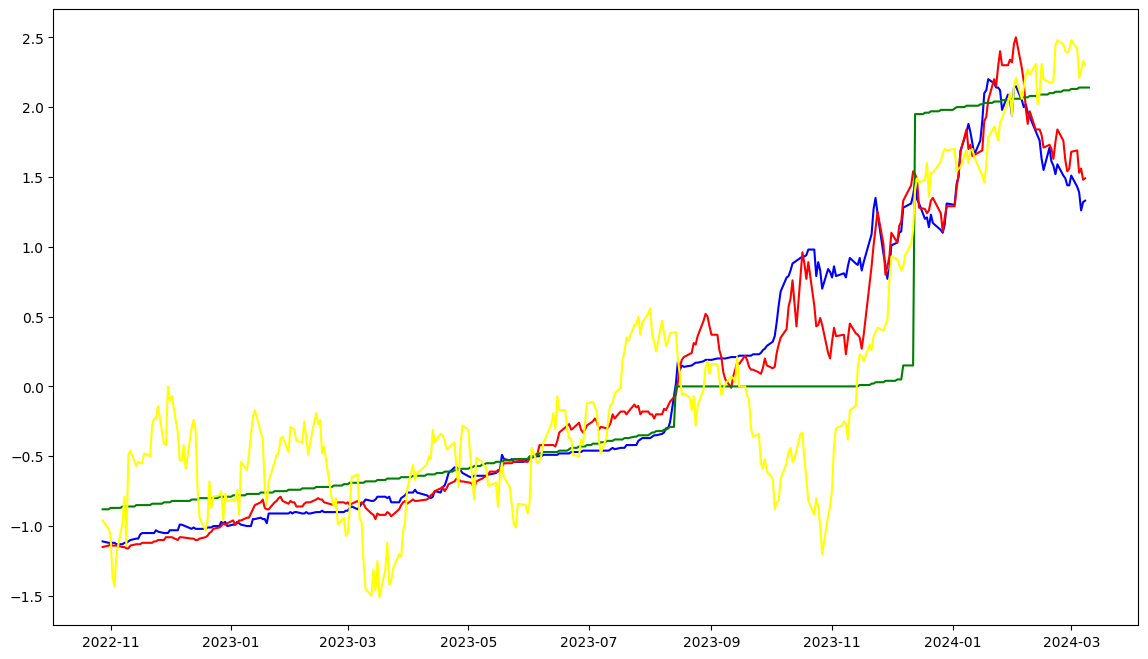

In [4]:
plt.figure(figsize=(14, 8))
plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')
plt.plot(df_doficial['FECHA'], df_doficial['CIERRE_N'], color='green')
plt.plot(df_djones['FECHA'], df_djones['CIERRE_N'], color='yellow')

print('Dolar Oficial: Verde')
print('Dolar MEP: Azul')
print('Merval: Rojo')
print('Down Jones: Amarillo')

In [5]:
predictors = ['RESULTADO', 'CIERRE1', 'CIERRE3', 'CIERRE5', 'CIERRE1_dmep', 'CIERRE3_dmep', 'CIERRE5_dmep', 'RESULTADO_dmep', 'CIERRE1_merval', 'CIERRE3_merval', 'CIERRE5_merval', 'RESULTADO_merval', 'CIERRE1_djones', 'CIERRE3_djones', 'CIERRE5_djones', 'RESULTADO_djones']
#predictors = ['CIERRE', 'APERTURA', 'RESULTADO']

df_mergeado = pd.merge(df_ypfd, df_dmep, on='FECHA', how='inner', suffixes=('', '_dmep'))
df_mergeado = pd.merge(df_mergeado, df_merval, on='FECHA', how='inner', suffixes=('', '_merval'))
df_mergeado = pd.merge(df_mergeado, df_djones, on='FECHA', how='inner', suffixes=('', '_djones'))
df_mergeado.dropna()

,ESPECIE,FECHA,APERTURA,MAXIMO,MINIMO,CIERRE,VOLUMEN,TIMESTAMP,RESULTADO,PORCENTAJE,...,CIERRE9_djones,TARGET1_djones,TARGET3_djones,TARGET5_djones,TARGET9_djones,CIERRE_N_djones,APERTURA_N_djones,MAXIMO_N_djones,MINIMO_N_djones,RESULTADO_N_djones
0,YPFD,2022-10-28,2436.44995,2436.45,2330.00,2354.55005,312582,1666926000,-81.89990,-0.033614,...,337.16000,0,0,1,1,-0.96,-1.42,-1.05,-1.31,3.81
1,YPFD,2022-10-31,2354.00000,2386.00,2283.45,2361.10010,328387,1667185200,7.10010,0.003016,...,337.72000,0,0,1,1,-1.02,-1.04,-1.05,-1.00,0.08
2,YPFD,2022-11-01,2410.00000,2533.75,2405.00,2509.50000,417206,1667271600,99.50000,0.041286,...,335.72000,0,1,1,1,-1.07,-0.90,-0.99,-1.05,-1.54
3,YPFD,2022-11-02,2454.64990,2536.00,2424.00,2432.75000,297664,1667358000,-21.89990,-0.008922,...,336.23001,0,1,0,1,-1.37,-1.08,-0.95,-1.25,-2.47
4,YPFD,2022-11-03,2450.00000,2538.00,2406.00,2499.80005,216625,1667444400,49.80005,0.020327,...,336.09000,1,1,1,0,-1.43,-1.42,-1.44,-1.47,-0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,YPFD,2024-02-20,19001.00000,19400.00,18500.00,18816.15039,215609,1708398000,-184.84961,-0.009728,...,390.23001,1,1,0,1,2.17,2.19,2.17,2.19,0.02
313,YPFD,2024-02-21,18891.75000,19421.70,18750.10,18780.00000,197474,1708484400,-111.75000,-0.005915,...,386.39999,1,1,0,0,2.19,2.16,2.15,2.12,0.44
314,YPFD,2024-02-22,18860.00000,20150.00,18860.00,20015.25000,332324,1708570800,1155.25000,0.061254,...,387.16000,1,0,1,0,2.44,2.35,2.45,2.37,0.93
315,YPFD,2024-02-23,20100.00000,20280.00,19100.00,20285.00000,209646,1708657200,185.00000,0.009204,...,388.45001,0,0,1,0,2.48,2.53,2.52,2.54,-0.29


In [8]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 1.7 MB/s eta 0:00:0000:0100:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.7 MB/s eta 0:00:0000:0100:01
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5

In [9]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd

# Create a new dataframe with only the 'CIERRE' column
data = df_ypfd.filter(['CIERRE'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

ModuleNotFoundError: No module named 'keras'

In [11]:
jupyter nbconvert --to txt tu_notebook.ipynb

SyntaxError: invalid syntax (824135917.py, line 1)

In [9]:
dataset.shape

(334, 1)

In [10]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

train_data


array([[0.00277504],
       [0.00754418],
       [0.00950145],
       [0.01133347],
       [0.00764733],
       [0.00796904],
       [0.01525782],
       [0.01148818],
       [0.0147814 ],
       [0.01330055],
       [0.01069251],
       [0.00874997],
       [0.        ],
       [0.00168466],
       [0.00941058],
       [0.01574652],
       [0.01994837],
       [0.01468071],
       [0.01430497],
       [0.01383837],
       [0.01472   ],
       [0.01531921],
       [0.01815073],
       [0.02366153],
       [0.02452842],
       [0.02945964],
       [0.02563353],
       [0.02363206],
       [0.02616888],
       [0.0195972 ],
       [0.02137273],
       [0.02211439],
       [0.01550094],
       [0.01560408],
       [0.01346755],
       [0.01456774],
       [0.01386784],
       [0.02088649],
       [0.02713648],
       [0.03374255],
       [0.0369449 ],
       [0.04081277],
       [0.042716  ],
       [0.03905196],
       [0.04613937],
       [0.04622532],
       [0.04622532],
       [0.053

Acá está la clave..... cómo armo x_train e y_train para que la máquina aprenda a obtener el y.

Una cosa que se me ocurre es armar el x con varios días previos y ponerle al y un % de ganancia/perdida

In [12]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data_ypf[i-20:i, 0])
    x_train.append(train_data_dmep[i-20:i, 0])
    x_train.append(train_data_merval[i-20:i, 0])
    y_train.append(train_data_ypf[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-03-06 11:05:23.867754: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


208/208 [==============================] - 13s 41ms/step - loss: 0.0074


Llegamos hasta acá

In [14]:
#Create de Testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [15]:
# Convert the data to a numpy array
x_test = np.array(x_test)

x_test.shape

(66, 60)

In [16]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse


3/3 [==============================] - 1s 27ms/step


2287.1317619981055

/tmp/ipykernel_14512/3879883700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


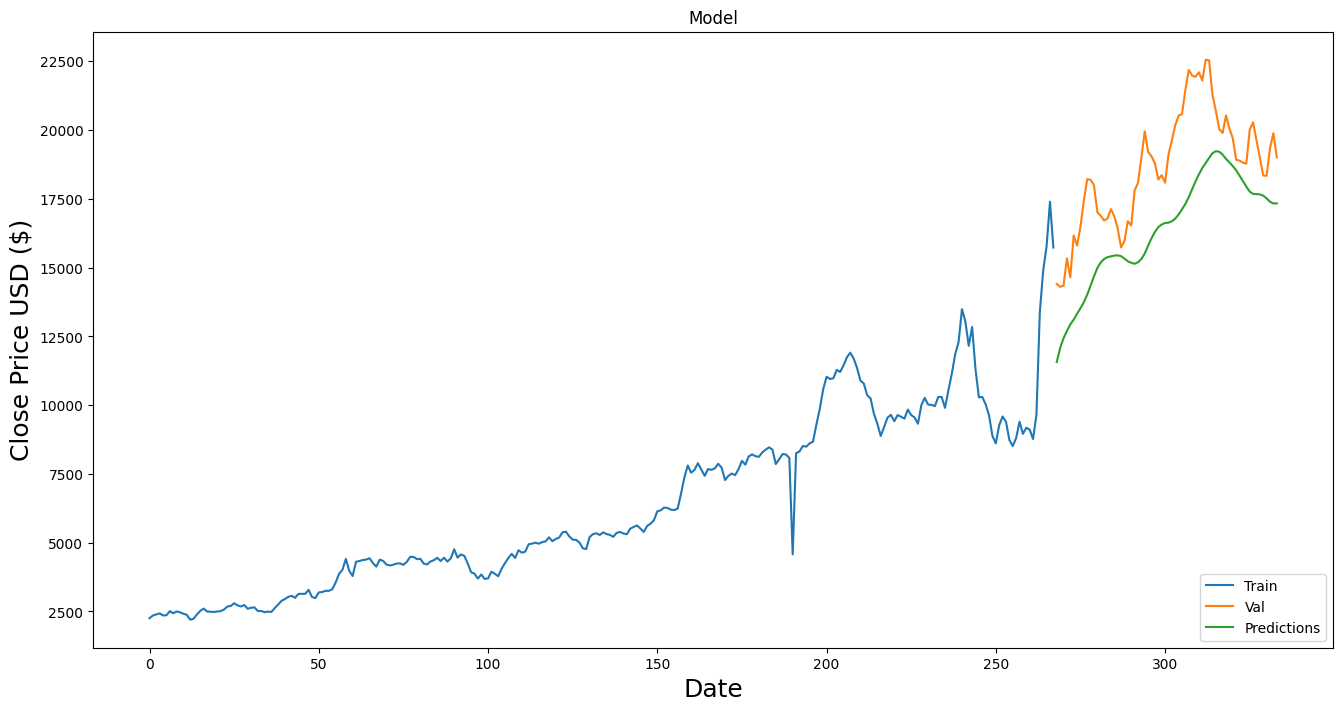

In [18]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['CIERRE'])
plt.plot(valid[['CIERRE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [19]:
#Show the valid and predicted prices
valid


,CIERRE,Predictions
268,14407.79980,11569.553711
269,14301.45020,12070.805664
270,14346.09961,12433.666992
271,15340.00000,12693.152344
272,14650.00000,12935.847656
...,...,...
329,18350.00000,17617.281250
330,18340.00000,17517.013672
331,19346.34961,17395.234375
332,19889.94922,17332.861328


In [21]:
#Get the quote
#ypfd_quote = load_especie('YPFD', access_token)
ypfd_quote = df_ypfd
#Create a new dataframe
new_df = ypfd_quote.filter(['CIERRE'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



1/1 [==============================] - 0s 43ms/step
[[17321.033]]


In [22]:
pred_price

array([[17321.033]], dtype=float32)

In [19]:
predictions

array([[11792.123 ],
       [12217.56  ],
       [12508.318 ],
       [12708.963 ],
       [12908.66  ],
       [13048.064 ],
       [13240.599 ],
       [13420.137 ],
       [13621.862 ],
       [13875.695 ],
       [14181.862 ],
       [14486.861 ],
       [14754.2705],
       [14921.219 ],
       [15016.791 ],
       [15058.535 ],
       [15074.59  ],
       [15097.271 ],
       [15105.153 ],
       [15078.781 ],
       [14996.004 ],
       [14907.026 ],
       [14865.915 ],
       [14841.879 ],
       [14906.429 ],
       [15025.971 ],
       [15218.632 ],
       [15488.247 ],
       [15727.259 ],
       [15922.605 ],
       [16063.7   ],
       [16131.114 ],
       [16166.118 ],
       [16164.991 ],
       [16207.831 ],
       [16298.403 ],
       [16437.803 ],
       [16610.402 ],
       [16787.34  ],
       [17003.54  ],
       [17262.184 ],
       [17506.227 ],
       [17720.016 ],
       [17909.902 ],
       [18053.361 ],
       [18206.553 ],
       [18348.467 ],
       [18399

In [20]:
y_test

array([[14407.7998 ],
       [14301.4502 ],
       [14346.09961],
       [15340.     ],
       [14650.     ],
       [16170.     ],
       [15800.2998 ],
       [16489.09961],
       [17435.     ],
       [18217.15039],
       [18191.65039],
       [17995.44922],
       [17015.90039],
       [16879.     ],
       [16714.44922],
       [16788.75   ],
       [17129.90039],
       [16866.59961],
       [16425.15039],
       [15735.     ],
       [15968.5    ],
       [16688.19922],
       [16530.65039],
       [17799.     ],
       [18085.     ],
       [19000.     ],
       [19955.75   ],
       [19204.55078],
       [19048.25   ],
       [18784.5    ],
       [18205.84961],
       [18361.     ],
       [18086.84961],
       [19106.25   ],
       [19622.44922],
       [20175.19922],
       [20531.90039],
       [20580.     ],
       [21459.     ],
       [22188.40039],
       [21981.75   ],
       [21940.05078],
       [22102.94922],
       [21799.34961],
       [22558.90039],
       [22

In [17]:
# Unir los arreglos
unidos = np.column_stack((predictions, y_test))

# Calcular la diferencia
diferencia = y_test - predictions

# Añadir la diferencia como una nueva columna
resultado = np.column_stack((unidos, diferencia))

resultado

array([[11569.55371094, 14407.7998    ,  2838.24608906],
       [12070.80566406, 14301.4502    ,  2230.64453594],
       [12433.66699219, 14346.09961   ,  1912.43261781],
       [12693.15234375, 15340.        ,  2646.84765625],
       [12935.84765625, 14650.        ,  1714.15234375],
       [13107.45996094, 16170.        ,  3062.54003906],
       [13323.17285156, 15800.2998    ,  2477.12694844],
       [13522.18652344, 16489.09961   ,  2966.91308656],
       [13742.76269531, 17435.        ,  3692.23730469],
       [14016.72070312, 18217.15039   ,  4200.42968687],
       [14347.63378906, 18191.65039   ,  3844.01660094],
       [14683.84375   , 17995.44922   ,  3311.60547   ],
       [14987.40234375, 17015.90039   ,  2028.49804625],
       [15190.30566406, 16879.        ,  1688.69433594],
       [15316.64941406, 16714.44922   ,  1397.79980594],
       [15380.23828125, 16788.75      ,  1408.51171875],
       [15409.10742188, 17129.90039   ,  1720.79296812],
       [15437.54492188, 16866.5

In [ ]:
#Main File
from importlib import reload
from utilities import *
from last_utilities import *
import matplotlib.pyplot as plt

acces_token = '2501a8d1e3bb3592457f0e03181bc6087ee16794'
df_dmep_original = load_especie("DOLAR MEP", acces_token)
df_djones_original = load_especie("DIA_US", acces_token)
df_merval_original = load_especie('MERVAL', acces_token)
df_doficial_original = load_especie('DOLAR OFICIAL', acces_token)

file = 'data/series_historicas_acciones.csv'
df = read_data(file)
df = convertir(df)
df = df.sort_values(by=['FECHA'])

dias = 350


In [ ]:
!pip install -U scikit-learn
!pip install -U keras

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sklearn



In [ ]:
df_dmep = recortar(df_dmep_original, dias)
df_doficial = recortar(df_doficial_original, dias + (int(dias/7)*2))
df_merval = recortar(df_merval_original, dias)
df_djones = recortar(df_djones_original, dias)

plt.figure(figsize=(14, 8))
plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')
plt.plot(df_doficial['FECHA'], df_doficial['CIERRE_N'], color='green')
plt.plot(df_djones['FECHA'], df_djones['CIERRE_N'], color='yellow')

print('Dolar Oficial: Verde')
print('Dolar MEP: Azul')
print('Merval: Rojo')
print('Down Jones: Amarillo')

In [ ]:
df_ypfd_original = load_especie('YPFD', acces_token)
df_ypfd = recortar(df_ypfd_original, dias)

In [ ]:
reload(last_utilities)

In [ ]:
from last_utilities import *

# Train the model using the fit method
# The training data and the target values are passed to this method
predictors = ['RESULTADO', 'CIERRE1', 'CIERRE3', 'CIERRE5', 'CIERRE1_dmep', 'CIERRE3_dmep', 'CIERRE5_dmep', 'RESULTADO_dmep', 'CIERRE1_merval', 'CIERRE3_merval', 'CIERRE5_merval', 'RESULTADO_merval', 'CIERRE1_djones', 'CIERRE3_djones', 'CIERRE5_djones', 'RESULTADO_djones']
#predictors = ['CIERRE', 'APERTURA', 'RESULTADO']

df_mergeado = pd.merge(df_ypfd, df_dmep, on='FECHA', how='inner', suffixes=('', '_dmep'))
df_mergeado = pd.merge(df_mergeado, df_merval, on='FECHA', how='inner', suffixes=('', '_merval'))
df_mergeado = pd.merge(df_mergeado, df_djones, on='FECHA', how='inner', suffixes=('', '_djones'))
df_mergeado.dropna()

model = entrenar_modelo(df_mergeado, predictors)

In [ ]:
result = testear_modelo(model, df_mergeado, predictors)

In [ ]:
result

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd

data = df_ypfd.filter(['CIERRE'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
training_data_len

In [ ]:
# Create a new dataframe with only the 'CIERRE' column
data = df.filter(['CIERRE'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



In [ ]:
df= df_mergeado
start = 2500
step = 100
all_predictions =  []
for i in range(start, df.shape[0], step):
    train = df.iloc[0:i].copy()
    test = df.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    print(predictions)
    all_predictions.append(predictions)

In [ ]:
df.shape[0]

In [ ]:
preditions = backtest(df_mergeado, model, predictors)

In [ ]:
horizons = [1, 3, 5, 9]
#df_ypfd = df_ypfd.apply(pd.to_numeric, errors='coerce')
for horizon in horizons:
    rolling_ypfd = df_ypfd.rolling(window=horizon)
    
    ratio_column = f'CIERRE{horizon}'
    df_ypfd[ratio_column] = df_ypfd['CIERRE'].shift(-horizon)
    

In [ ]:
df_ypfd

In [ ]:
grupos_por_clase = df.groupby('CLASE')
for clave_clase, grupo_clase in grupos_por_clase:
    grupos_por_simbolo = grupo_clase.groupby('SIMBOLO')
    for clave_grupo, grupo in grupos_por_simbolo:
        df1 = grupos_por_simbolo.get_group(clave_grupo)
        df1 = df1.tail(dias)
        df1 = newBullishBearish(df1)
        df1 = normalizar(df1)
        plt.figure(figsize=(14, 8))
        plt.plot(df1['FECHA'], df1['CIERRE_N'], color='orange')
        plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
        plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')
        plt.plot(df_doficial['FECHA'], df_doficial['CIERRE_N'], color='green')
        #plt.plot(df_djones['FECHA'], df_djones['CIERRE_N'], color='yellow')
        plt.xticks(rotation=45, fontsize=16)
        plt.grid()
        plt.xlabel('Fecha')
        plt.ylabel('Valor de Cierre')
        plt.title('Cierres de'+ ' ' + clave_clase + '-' + clave_grupo)
        plt.show()

In [ ]:
df_dmep.index = df_dmep['FECHA']
df_dmep.index

In [ ]:
grupos_por_simbolo = df.groupby('SIMBOLO')
df1 = pd.DataFrame()
for clave_grupo, grupo in grupos_por_simbolo:
    df1 = grupos_por_simbolo.get_group(clave_grupo)
    df1 = df1.tail(dias)
    df1 = newBullishBearish(df1)
    df1 = normalizar(df1)

    plt.figure(figsize=(14, 8))
    plt.plot(df1['FECHA'], df1['RESULTADO_N'], color='orange')
    plt.plot(df_dmep['FECHA'], df_dmep['RESULTADO_N'], color='blue')
    plt.plot(df_merval['FECHA'], df_merval['RESULTADO_N'], color='red')
    
    plt.xticks(rotation=45, fontsize=16)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Valor de Cierre')
    plt.title('Cierres de'+ ' ' + clave_grupo)
    plt.show()

In [ ]:
panel_gral_file = 'data/panelgeneral.csv'
df_panel_gral = read_data(panel_gral_file)
df_panel_gral = df_panel_gral.sort_values(by=['FECHA'])
df_panel_gral = convertir(df_panel_gral)

grupos_por_simbolo = df_panel_gral.groupby('SIMBOLO')

for clave_grupo, grupo in grupos_por_simbolo:
    df1 = grupos_por_simbolo.get_group(clave_grupo)
    df1 = df1.tail(dias)
    df1 = newBullishBearish(df1)
    df1 = normalizar(df1)

    plt.figure(figsize=(14, 8))
    plt.plot(df1['FECHA'], df1['CIERRE_N'], color='orange')
    plt.plot(df_dmep['FECHA'], df_dmep['CIERRE_N'], color='blue')
    plt.plot(df_merval['FECHA'], df_merval['CIERRE_N'], color='red')

    plt.xticks(rotation=45, fontsize=16)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Valor de Cierre')
    plt.title('Cierres de' + ' ' + clave_grupo)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()


In [ ]:
df1

In [ ]:
#Cómo marcar alertas en un gráfico?
# definir que quiero hacer.... comprar o vender?: Esto se puede definir a partir de % que estoy dispuesto a perder o ganar
# Costo de la operación: comisiones, impuestos, etc
# Costo del mantenimiento mensual
# inflación acumulada
#Alerta de Venta por papel
#Entrenar un modelo para predecir el precio de cierre

comprar = 2
vender = 20
tamaño_lote = 4
grupos_por_simbolo = df.groupby('SIMBOLO')
df1 = pd.DataFrame()
for clave_grupo, grupo in grupos_por_simbolo:
    lotes = [grupo.iloc[i:i+tamaño_lote] for i in range(0, len(grupo), tamaño_lote)]
    
    for i, lote_actual in enumerate(lotes):
        lote_procesado = procesar_lote(lote_actual, comprar, vender)
        resultado_medio = lote_procesado['RESULTADO_N'].mean()
        resultado_avg = lote_procesado['RES_PESADO_N'].mean()
        print('Clave:' + clave_grupo+ ' Indice:', i, ' Resultado pesado:', resultado_medio)
    

In [ ]:
lote_procesado